<h1>Maspex - Task 2 - PART 2</h1>
<hr>
<b>Exploratory data analysis dataset.csv</b><br/>
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

#standard library imports
from pathlib import Path
from itertools import cycle, islice, combinations
import re


#third party imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pylab as pylab
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [335]:
#standard library imports
from pathlib import Path
from itertools import cycle, islice, combinations

#third party imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib

In [336]:
train_df = pd.read_csv(r"../data/train.csv",parse_dates=["datetime"])
train_df_initial = train_df.copy()
test_df = pd.read_csv(r"../data/test.csv",parse_dates=["datetime"])

In [337]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [338]:
train_df['datetime'].iloc[0], train_df['datetime'].iloc[-1]

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [339]:
train_df.to_json(r'../data/train_df_inputs_json.json' )
pd.read_json(r'../data/train_df_inputs_json.json').head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<br>
<h3>Feature Engineering</h3>
<br>

In [340]:
train_df["dayofweek"] = train_df["datetime"].dt.dayofweek
test_df["dayofweek"] = test_df["datetime"].dt.dayofweek

In [341]:
train_df["month"] = train_df["datetime"].dt.month
test_df["month"] = test_df["datetime"].dt.month

In [342]:
train_df["hour"] = train_df["datetime"].dt.hour
test_df["hour"] = test_df["datetime"].dt.hour

In [343]:
category_cols_names = ["season","weather","holiday","workingday","hour","dayofweek","month"]
for var in category_cols_names:
    train_df[var] = train_df[var].astype("category")
    test_df[var] = test_df[var].astype("category")

Creating dummy variables

In [344]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dayofweek', 'month', 'hour'],
      dtype='object')

In [345]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'dayofweek', 'month', 'hour'],
      dtype='object')

In [346]:
columns_to_transform = ["dayofweek", "month", "hour","weather","season"]

In [347]:

for col_to_transform in columns_to_transform:
    aux_df = pd.get_dummies(train_df[col_to_transform], prefix=col_to_transform + "_cat")
    train_df = pd.concat([train_df, aux_df], axis=1)
    aux_df = pd.get_dummies(test_df[col_to_transform], prefix=col_to_transform + "_cat")
    test_df = pd.concat([test_df, aux_df], axis=1)

In [348]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dayofweek', 'month', 'hour', 'dayofweek_cat_0', 'dayofweek_cat_1',
       'dayofweek_cat_2', 'dayofweek_cat_3', 'dayofweek_cat_4',
       'dayofweek_cat_5', 'dayofweek_cat_6', 'month_cat_1', 'month_cat_2',
       'month_cat_3', 'month_cat_4', 'month_cat_5', 'month_cat_6',
       'month_cat_7', 'month_cat_8', 'month_cat_9', 'month_cat_10',
       'month_cat_11', 'month_cat_12', 'hour_cat_0', 'hour_cat_1',
       'hour_cat_2', 'hour_cat_3', 'hour_cat_4', 'hour_cat_5', 'hour_cat_6',
       'hour_cat_7', 'hour_cat_8', 'hour_cat_9', 'hour_cat_10', 'hour_cat_11',
       'hour_cat_12', 'hour_cat_13', 'hour_cat_14', 'hour_cat_15',
       'hour_cat_16', 'hour_cat_17', 'hour_cat_18', 'hour_cat_19',
       'hour_cat_20', 'hour_cat_21', 'hour_cat_22', 'hour_cat_23',
       'weather_cat_1', 'weather_cat_2', 'weather_cat_3', 'weather_cat_4',
     

In [349]:
columns_to_drop = ['datetime', 'atemp'] + columns_to_transform

In [350]:
train_df = train_df.drop(columns_to_drop+['casual', 'registered'], axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.shape, test_df.shape

((10886, 57), (6493, 56))

<h3>Training the model</h3>

In [351]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':20,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, 30))
kwargs = {"color":my_colors}

In [352]:
def rmsl_error_metric(y, y_hat) -> float:
    """
    # Root Mean Squared Logarithmic Error (RMSLE)
    :param y: array-like structure actual values to predict
    :param y_hat: array-like structure   predicted values
    :return: float
    """
    y = np.exp(y)
    y_hat = np.exp(y_hat)
    log1 = np.nan_to_num(np.array([np.log(obs + 1) for obs in y]))
    log2 = np.nan_to_num(np.array([np.log(obs + 1) for obs in y_hat]))
    res = (log1 - log2) ** 2
    return np.sqrt(np.mean(res))


In [353]:
x = train_df.loc[:, train_df.columns != 'count']
y = np.log1p(train_df.loc[:, 'count'])
x.shape, y.shape

((10886, 56), (10886,))

## Splitting data according to first 75% of rows and last 25% of rows in order to obtain two time series.

In [354]:
splitting_index = int(len(x)*0.75)

In [355]:
x_train = x.iloc[:splitting_index,:]
x_test = x.iloc[splitting_index:,:]
y_train = y.iloc[:splitting_index]
y_test = y.iloc[splitting_index:]

<h4>Linear regression model</h4>

In [356]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [357]:
predicitons_lr = lr_model.predict(x_test)
print ("RMSL error value for linear regression is",rmsl_error_metric(y_test,predicitons_lr))

RMSL error value for linear regression is 0.6705356574875491


Text(0.5, 1.0, 'Predicted values - linear regression')

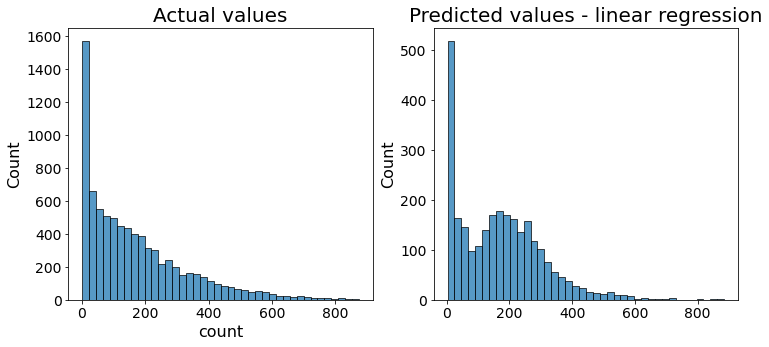

In [358]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(np.exp(y_train),ax=ax1,bins=40)
sns.histplot(np.exp(predicitons_lr),ax=ax2,bins=40)
ax1.set_title("Actual values")
ax2.set_title("Predicted values - linear regression")

In [359]:
predicitons_lr = pd.Series(predicitons_lr, index=y_test.index)

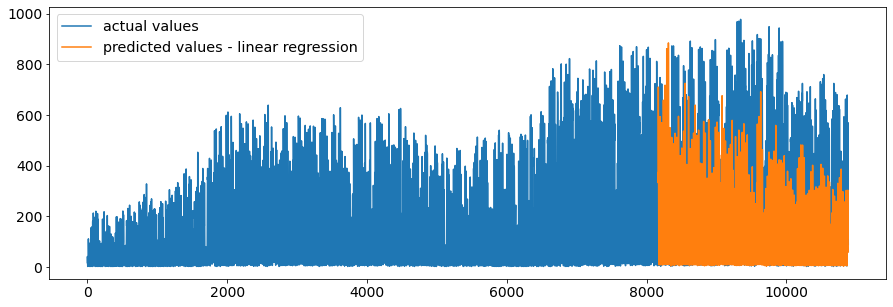

In [360]:
fig,ax= plt.subplots()
ax.plot(np.exp(y), label="actual values")
ax.plot(np.exp(predicitons_lr), label="predicted values - linear regression")
ax.legend()

<h4>Random forest regressor</h4>

In [361]:
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [362]:
predicitons_rf = rf_model.predict(x_test)
print ("RMSL error value for Random Forest is",rmsl_error_metric(y_test,predicitons_rf))

RMSL error value for Random Forest is 0.48436537369337607


Text(0.5, 1.0, 'Predicted values - random forest regressor')

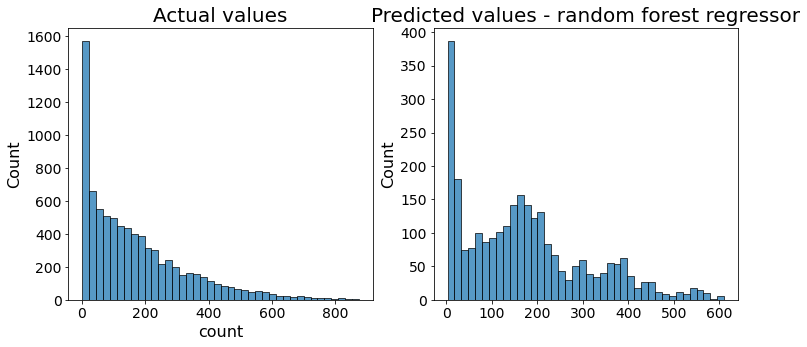

In [363]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(np.exp(y_train),ax=ax1,bins=40)
sns.histplot(np.exp(predicitons_rf),ax=ax2,bins=40)
ax1.set_title("Actual values")
ax2.set_title("Predicted values - random forest regressor")

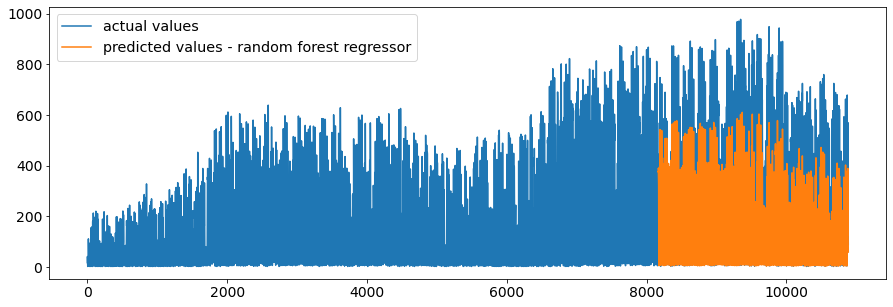

In [364]:
predicitons_rf = pd.Series(predicitons_rf, index=y_test.index)
fig,ax= plt.subplots()
ax.plot(np.exp(y), label="actual values")
ax.plot(np.exp(predicitons_rf), label="predicted values - random forest regressor")
ax.legend()

<h4>Gradient Boosting Regressor</h4>

In [365]:
gb_model = GradientBoostingRegressor(n_estimators=1000,alpha=0.01)

In [366]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.01, n_estimators=1000)

In [367]:
predicitons_gb = gb_model.predict(x_test)

In [368]:
print ("RMSL error for GradientBoosting is  ",rmsl_error_metric(y_test,predicitons_gb))

RMSL error for GradientBoosting is   0.4812261198065519


Text(0.5, 1.0, 'Predicted values - gradient bookst regressor')

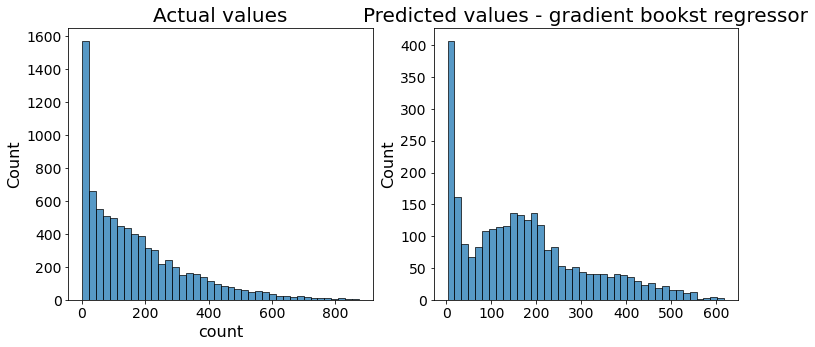

In [369]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(np.exp(y_train),ax=ax1,bins=40)
sns.histplot(np.exp(predicitons_gb),ax=ax2,bins=40)
ax1.set_title("Actual values")
ax2.set_title("Predicted values - gradient bookst regressor")

In [370]:
predicitons_gb = pd.Series(predicitons_gb, index=y_test.index)

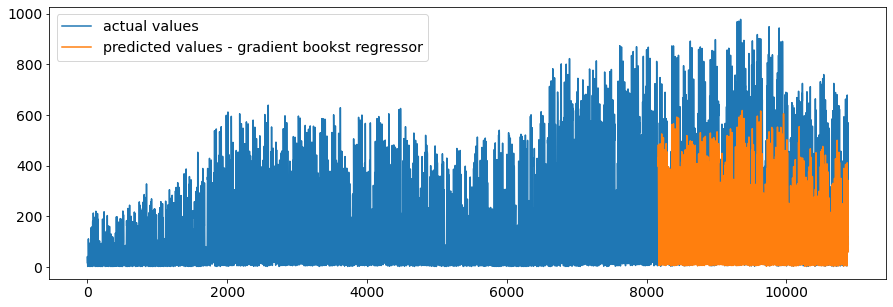

In [371]:
fig,ax= plt.subplots()
ax.plot(np.exp(y), label="actual values")
ax.plot(np.exp(predicitons_gb), label="predicted values - gradient bookst regressor")
ax.legend()

<h3>Comparing models and saving the best one</h3>

<center><b>Models comparison</b></center>

<table>    
    <thead>
        <tr>
            <th>Type of model</th>
            <th>RMSLE error</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Linear Regression</td>
            <td>0.67</td>
       </tr>
        <tr>
            <td>RandomForestRegressor</td>
            <td>0.49</td>
       </tr>
        <tr>
            <td>GradientBoostingRegressor</td>
            <td>0.48</td>
       </tr>
    </tbody>
</table>

Random forest regressor seems to give best results for a basic configuration among all trained models. We are going to train this model with all available data and save random forrest model.

In [372]:
gb_model_final = GradientBoostingRegressor(n_estimators=1000,alpha=0.01)
gb_model_final .fit(x,y)

GradientBoostingRegressor(alpha=0.01, n_estimators=1000)

In [373]:
predicitons_gb_final = gb_model_final.predict(x)
print("RMSL error value for Gradient boost final version is",rmsl_error_metric(y,predicitons_rf_final))

RMSL error value for Gradient boost final version is 0.3037286739450481


Text(0.5, 1.0, 'Predicted values - random forest regressor final version')

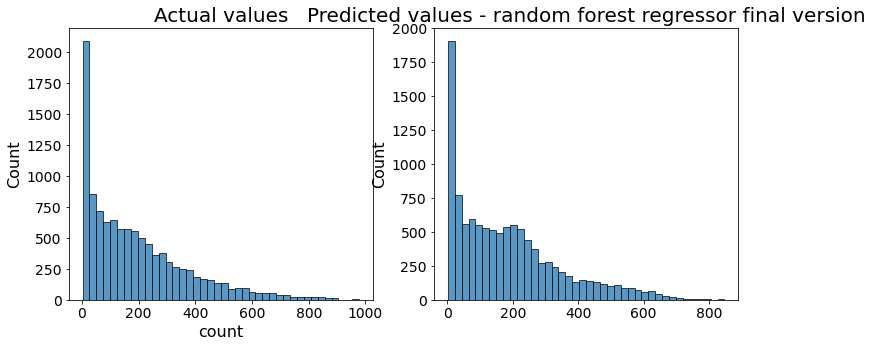

In [374]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(np.exp(y),ax=ax1,bins=40)
sns.histplot(np.exp(predicitons_gb_final),ax=ax2,bins=40)
ax1.set_title("Actual values")
ax2.set_title("Predicted values - random forest regressor final version")

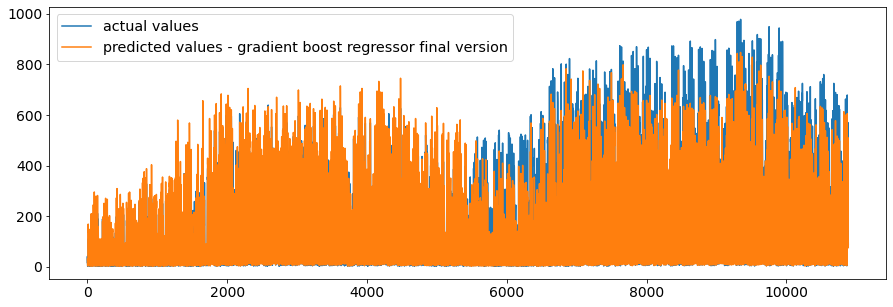

In [375]:
predicitons_rf_final = pd.Series(predicitons_gb_final, index=y.index)
fig,ax= plt.subplots()
ax.plot(np.exp(y), label="actual values")
ax.plot(np.exp(predicitons_rf_final), label="predicted values - gradient boost regressor final version")
ax.legend()

In [376]:
# save the model to disk
filename = '../resources/final_model_rf.sav'
joblib.dump(gb_model_final, filename)

['../resources/final_model_rf.sav']

In [377]:
# load the model from disk
loaded_model = joblib.load(filename)
predicitons_loaded = loaded_model.predict(x)
print ("RMSL error value for grandient boost final version is",rmsl_error_metric(y,predicitons_loaded))

RMSL error value for grandient boost final version is 0.30372867394504804


We can now continue with the deployment phase!

In [378]:
rmsl_error_metric(y,predicitons_loaded)

0.30372867394504804